### Pre processing

+ Importing Librarys

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [80]:
df=pd.read_csv(r"C:\Users\Aman\Downloads\Algerian_forest_fires_dataset_UPDATE.csv",header=1,on_bad_lines='skip')
df.drop(df.index[[122,123,124]],axis=0,inplace=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [81]:
df.rename(columns = {' RH' : 'RH', ' Ws' : 'Ws' , 'Rain ' : 'Rain' , 'Classes  ' : 'Classes'},inplace = True)

In [82]:
def missing_values_impute(df):
    for i in df:
        if df[i].dtypes=='O':
            mode=df[i].mode()[0]
            df[i].fillna(mode,inplace=True)
        else:
            median=df[i].median()
            df[i].fillna(median,inplace=True)

In [83]:
missing_values_impute(df)

In [84]:
# Checking the missingz values
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [85]:
def datatype_impute(df,columns,data_type):
    dt={key:data_type for key in columns}
    for i in columns:
        df[i]=df[i].str.replace(" ","")
    df=df.astype(dt,errors="ignore")
    print(df.dtypes)

In [86]:
def datatype_numeric_impute(df,columns):
    for i in columns:
        df[i]=df[i].str.replace(" ","")
        df[i]=df[i].apply(pd.to_numeric)
    print(df.dtypes)

In [87]:
columns=df.iloc[:0,:13]
data_type="float64"
datatype_numeric_impute(df,columns)

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object


In [88]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [89]:
df['Classes']=df["Classes"].str.strip()

In [90]:
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [91]:
df['Classes'].replace('fire',1,inplace=True)
df['Classes'].replace('not fire',0,inplace=True)

In [92]:
df['Classes']

0      0
1      0
2      0
3      0
4      0
      ..
242    1
243    0
244    0
245    0
246    0
Name: Classes, Length: 244, dtype: int64

In [93]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [94]:
df['Classes']

0      0
1      0
2      0
3      0
4      0
      ..
242    1
243    0
244    0
245    0
246    0
Name: Classes, Length: 244, dtype: int64

In [95]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.008197,0.565574
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.437383,0.496700
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 28.6 KB


In [97]:
df.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Classes          2
dtype: int64

# EDA

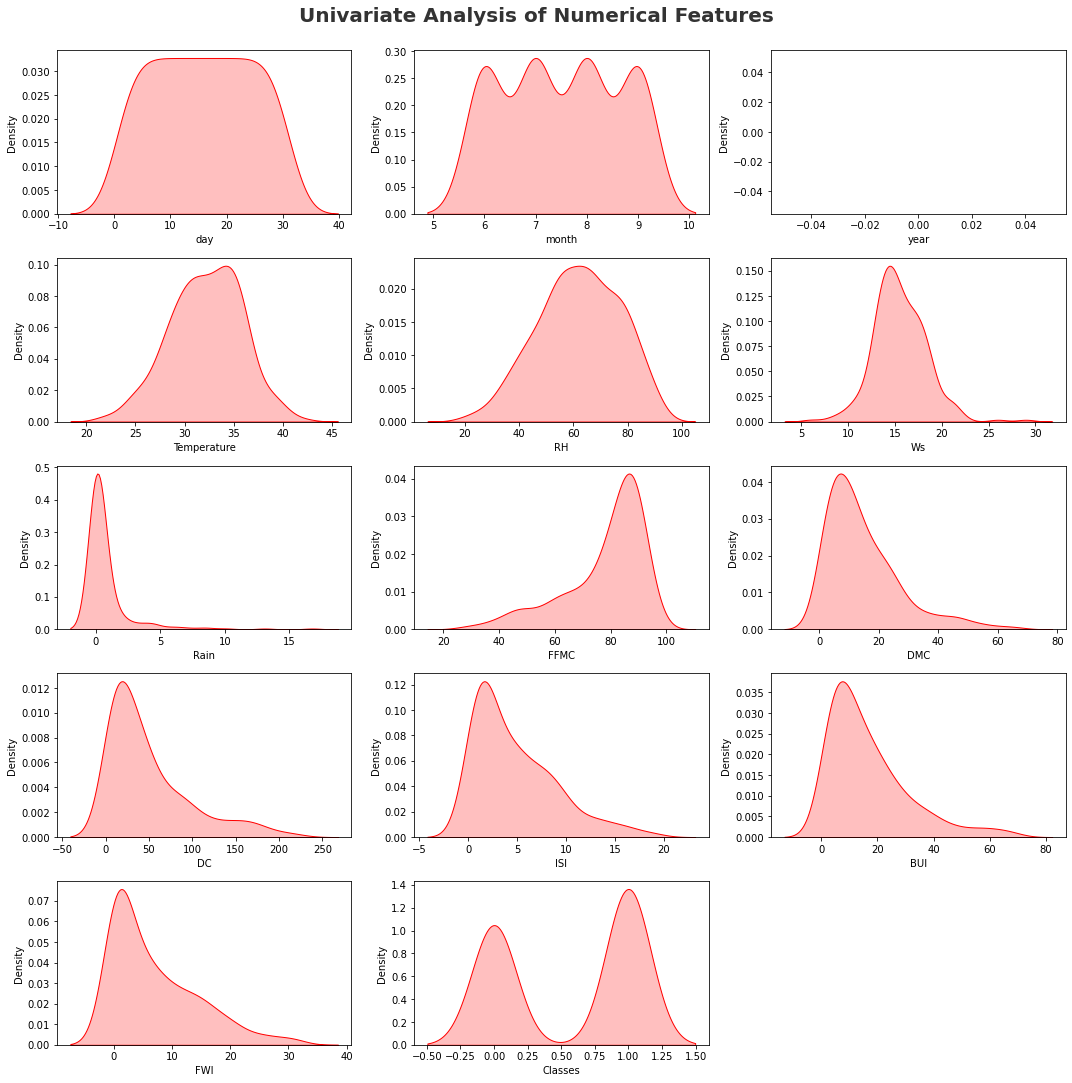

In [98]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for j,i in enumerate(df):
    plt.subplot(5,3,j+1)
    sns.kdeplot(x=df[i],shade=True, color='r')
    plt.tight_layout()

# Observations
1. Rain, DMC, DC, FWI are rightly skewed(log normal distribution)
2. In this binary class classification, Data set is imbalaned
3. There is no variance in the year attribute

# Multivariate analysis
* Multivariate analysis is the analysis of more than one variable.

In [100]:
df.drop(columns="year",inplace=True)

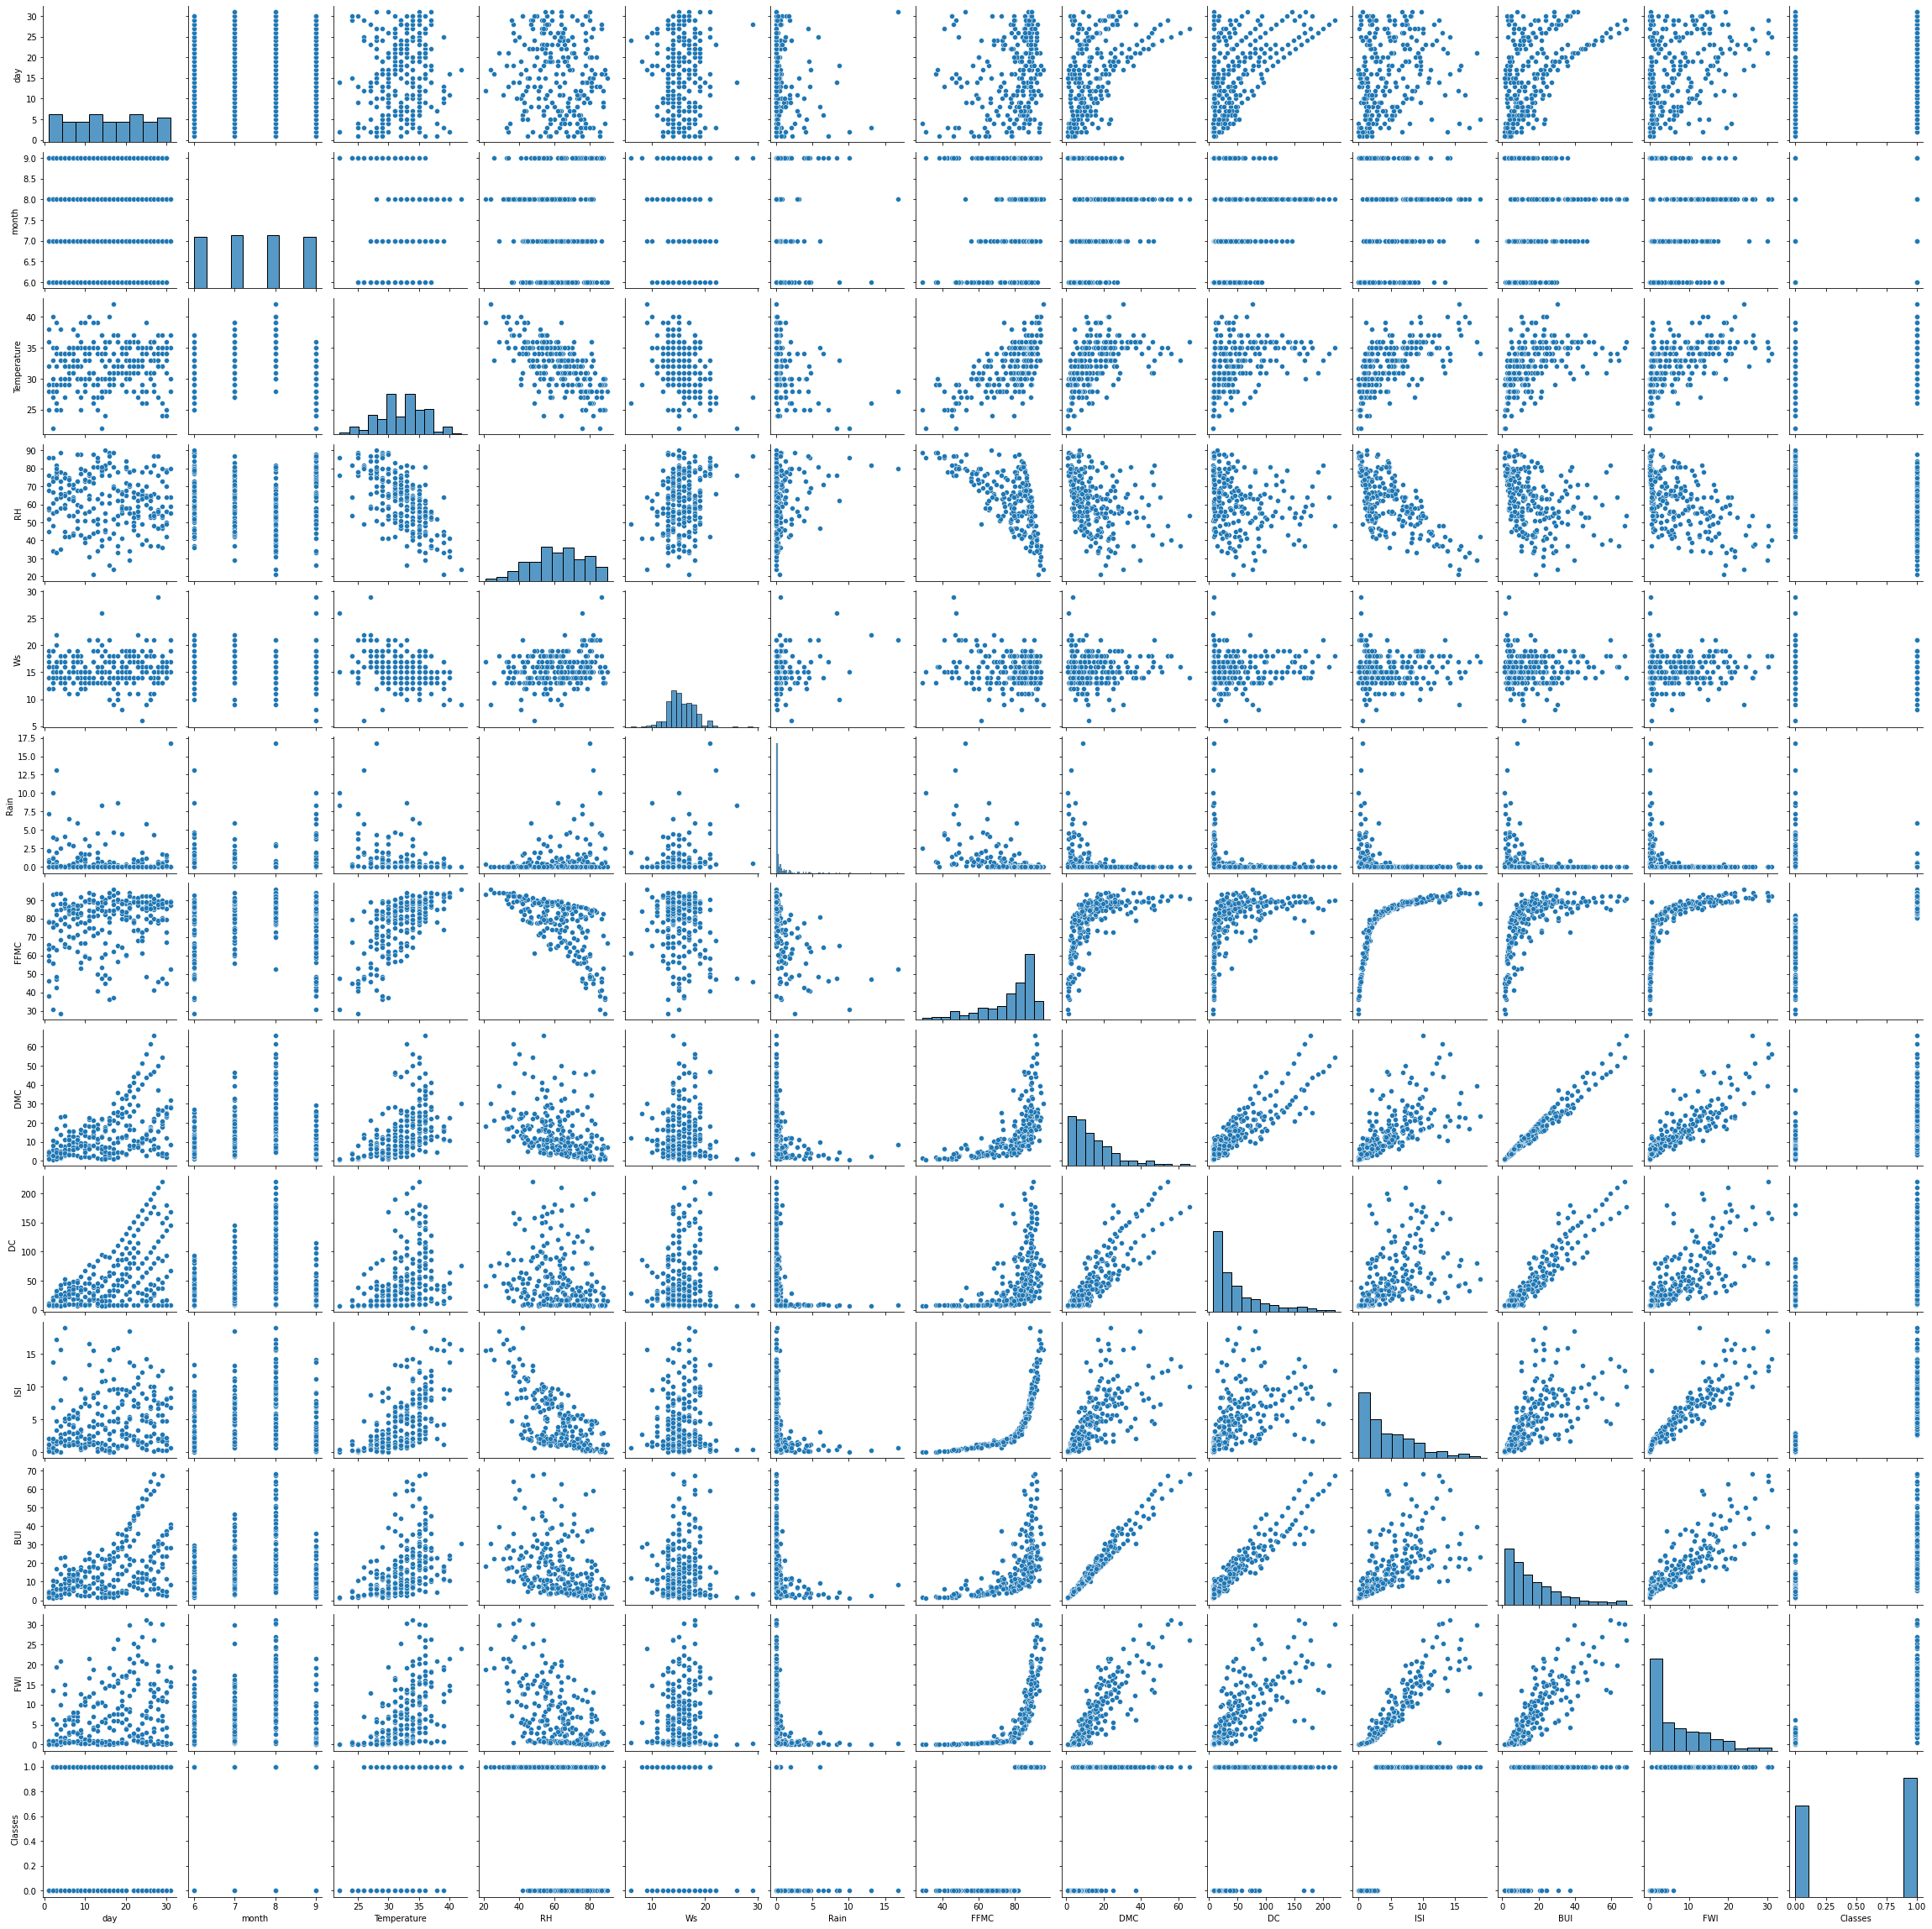

In [102]:
sns.pairplot(df)

In [101]:
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350909,0.201784
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.084119,0.022333
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.558800,0.518119
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.570483,-0.435023
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.029001,-0.066529
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.322810,-0.379449
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.686342,0.770114
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.874924,0.584188
DC,5.279300e-01,1.276691e-01,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740175,0.507132
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.908054,0.735511


In [23]:
df.cov()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,7.788167e+01,4.641920e-16,3.071308,-9.747689,1.165621,-1.980908,28.346758,53.654328,221.859379,6.548769,64.839034,23.032065,0.884504
month,4.641920e-16,1.238683e+00,-0.238683,-0.627572,-0.129630,0.078601,0.248560,0.938477,6.766276,0.286626,1.356790,0.696296,0.012346
Temperature,3.071308e+00,-2.386831e-01,13.204817,-35.396782,-2.840215,-2.374270,35.297598,21.712423,64.113719,9.218043,23.512265,15.102287,0.935168
RH,-9.747689e+00,-6.275720e-01,-35.396782,221.539415,9.874739,6.635431,-137.785533,-74.580245,-156.174991,-42.920524,-73.700941,-63.152169,-3.216117
Ws,1.165621e+00,-1.296296e-01,-2.840215,9.874739,7.897102,0.956129,-6.577727,-0.043306,10.204060,0.178913,1.187799,0.606139,-0.092862
Rain,-1.980908e+00,7.860082e-02,-2.374270,6.635431,0.956129,3.997623,-15.595918,-7.135415,-28.259196,-2.897687,-8.496825,-4.800293,-0.376833
FFMC,2.834676e+01,2.485597e-01,35.297598,-137.785533,-6.577727,-15.595918,205.565939,106.820535,344.048788,44.283138,120.090018,73.187426,5.484349
DMC,5.365433e+01,9.384774e-01,21.712423,-74.580245,-0.043306,-7.135415,106.820535,152.968382,515.551947,34.831449,172.536341,80.480590,3.588791
DC,2.218594e+02,6.766276e+00,64.113719,-156.174991,10.204060,-28.259196,344.048788,515.551947,2267.606583,99.199508,637.129111,262.143165,11.994976
ISI,6.548769e+00,2.866255e-01,9.218043,-42.920524,0.178913,-2.897687,44.283138,34.831449,99.199508,17.433281,37.714477,28.198196,1.525363


<AxesSubplot:>

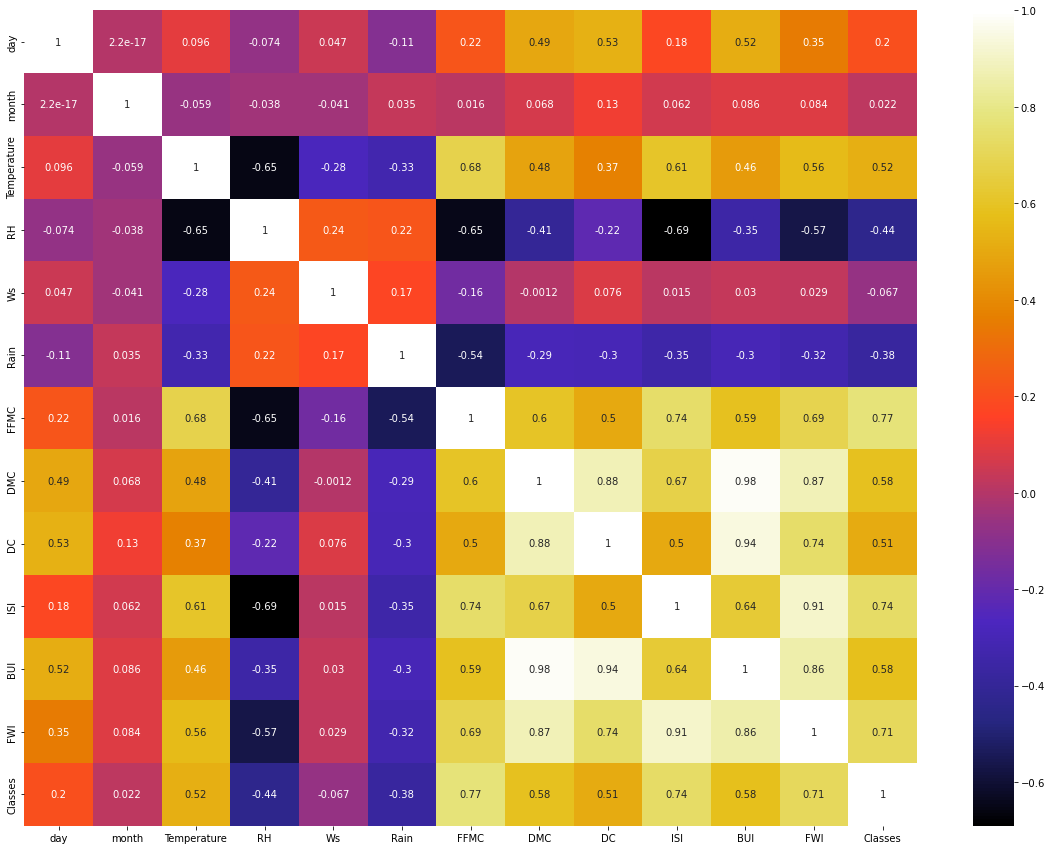

In [24]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),cmap="CMRmap", annot=True)

# Check Multicollinearity in Numerical features
* Using VIF Variance Infliation Factor

In [25]:
def vif_score(x):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    from sklearn.preprocessing import StandardScaler
    scalar=StandardScaler()
    arr=scalar.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=['Features','VIF_score'])

In [26]:
vif_score(df)

,Features,VIF_score
0,day,1.482512
1,month,1.091362
2,Temperature,2.429788
3,RH,3.108823
4,Ws,1.334174
5,Rain,1.577441
6,FFMC,5.283862
7,DMC,77.256488
8,DC,25.437428
9,ISI,15.924178


* Usually we drop the features having VIF_score more 10

# Visualization of target column

Text(0, 0.5, 'Count')

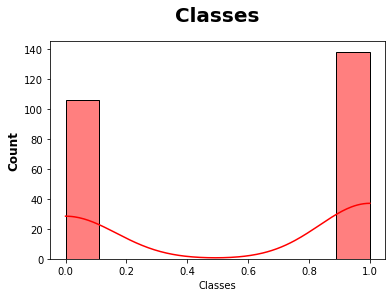

In [27]:
sns.histplot(df.Classes, kde=True, color='r')
plt.title("Classes", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)

# Outliers 

<AxesSubplot:>

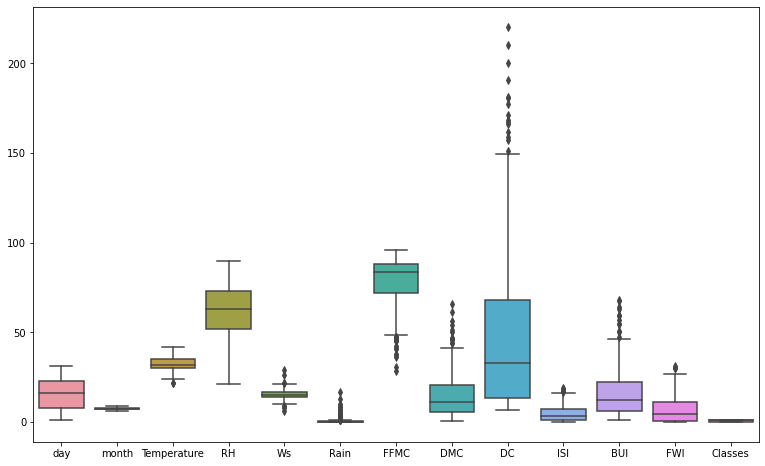

In [28]:
plt.figure(figsize=(13,8))
sns.boxplot(data=df,)

In [29]:
def outliers_imputation_mild(df,column):
    IQR=df[column].quantile(0.75)-df[column].quantile(0.25)
    lower_fence=df[column].quantile(0.25)-(IQR*1.5)
    upper_fence=df[column].quantile(0.75)+(IQR*1.5)
    print("IQR:",IQR)
    print(f"Lower Fence {column}:",lower_fence)
    print(f"Upper Fence {column}:",upper_fence)
    print("____________________________________________")
    df.loc[df[column]<=lower_fence,column]=lower_fence
    df.loc[df[column]>=upper_fence,column]=upper_fence 

In [30]:
columns=df.columns

In [31]:
for col in columns:
    outliers_imputation_mild(df,col)

IQR: 15.0
Lower Fence day: -14.5
Upper Fence day: 45.5
____________________________________________
IQR: 1.0
Lower Fence month: 5.5
Upper Fence month: 9.5
____________________________________________
IQR: 5.0
Lower Fence Temperature: 22.5
Upper Fence Temperature: 42.5
____________________________________________
IQR: 21.25
Lower Fence RH: 20.125
Upper Fence RH: 105.125
____________________________________________
IQR: 3.0
Lower Fence Ws: 9.5
Upper Fence Ws: 21.5
____________________________________________
IQR: 0.5
Lower Fence Rain: -0.75
Upper Fence Rain: 1.25
____________________________________________
IQR: 16.224999999999994
Lower Fence FFMC: 47.73750000000001
Upper Fence FFMC: 112.63749999999999
____________________________________________
IQR: 14.95
Lower Fence DMC: -16.624999999999996
Upper Fence DMC: 43.175
____________________________________________
IQR: 54.87500000000001
Lower Fence DC: -69.03750000000002
Upper Fence DC: 150.46250000000003
___________________________________

<AxesSubplot:>

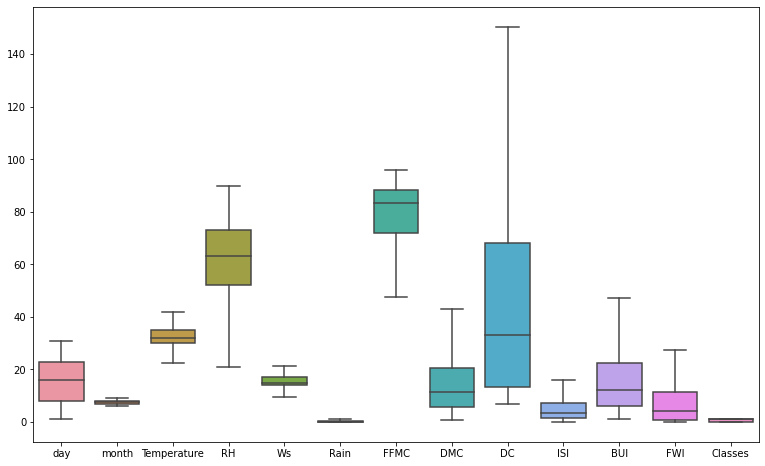

In [32]:
plt.figure(figsize=(13,8))
sns.boxplot(data=df,)

In [33]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1.0,6.0,29.0,57.0,18.0,0.00,65.7000,3.4,7.6,1.3,3.4,0.5,0.0
1,2.0,6.0,29.0,61.0,13.0,1.25,64.4000,4.1,7.6,1.0,3.9,0.4,0.0
2,3.0,6.0,26.0,82.0,21.5,1.25,47.7375,2.5,7.1,0.3,2.7,0.1,0.0
3,4.0,6.0,25.0,89.0,13.0,1.25,47.7375,1.3,6.9,0.0,1.7,0.0,0.0
4,5.0,6.0,27.0,77.0,16.0,0.00,64.8000,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26.0,9.0,30.0,65.0,14.0,0.00,85.4000,16.0,44.5,4.5,16.9,6.5,1.0
243,27.0,9.0,28.0,87.0,15.0,1.25,47.7375,6.5,8.0,0.1,6.2,0.0,0.0
244,28.0,9.0,27.0,87.0,21.5,0.50,47.7375,3.5,7.9,0.4,3.4,0.2,0.0
245,29.0,9.0,24.0,54.0,18.0,0.10,79.7000,4.3,15.2,1.7,5.1,0.7,0.0


#### Splitting the data in train and test

In [34]:
X=df.drop(columns="Classes")
X

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1.0,6.0,29.0,57.0,18.0,0.00,65.7000,3.4,7.6,1.3,3.4,0.5
1,2.0,6.0,29.0,61.0,13.0,1.25,64.4000,4.1,7.6,1.0,3.9,0.4
2,3.0,6.0,26.0,82.0,21.5,1.25,47.7375,2.5,7.1,0.3,2.7,0.1
3,4.0,6.0,25.0,89.0,13.0,1.25,47.7375,1.3,6.9,0.0,1.7,0.0
4,5.0,6.0,27.0,77.0,16.0,0.00,64.8000,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
242,26.0,9.0,30.0,65.0,14.0,0.00,85.4000,16.0,44.5,4.5,16.9,6.5
243,27.0,9.0,28.0,87.0,15.0,1.25,47.7375,6.5,8.0,0.1,6.2,0.0
244,28.0,9.0,27.0,87.0,21.5,0.50,47.7375,3.5,7.9,0.4,3.4,0.2
245,29.0,9.0,24.0,54.0,18.0,0.10,79.7000,4.3,15.2,1.7,5.1,0.7


In [35]:
y=df["Classes"]
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
242    1.0
243    0.0
244    0.0
245    0.0
246    0.0
Name: Classes, Length: 244, dtype: float64

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,random_state=90)

In [37]:
X_train

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
85,25.0,8.0,35.0,60.0,15.0,0.00,88.9,43.175,150.4625,8.20,47.3125,20.3000
63,3.0,8.0,35.0,63.0,14.0,0.30,76.6,5.700,10.0000,1.70,5.5000,0.8000
175,21.0,7.0,36.0,29.0,18.0,0.00,93.9,39.600,80.6000,16.15,39.5000,27.3875
11,12.0,6.0,26.0,81.0,19.0,0.00,84.0,13.800,61.4000,4.80,17.7000,7.1000
231,15.0,9.0,32.0,51.0,13.0,0.00,88.7,16.000,50.2000,6.90,17.8000,9.8000
...,...,...,...,...,...,...,...,...,...,...,...,...
67,7.0,8.0,32.0,69.0,16.0,0.00,86.5,15.500,48.6000,5.50,17.2000,8.0000
162,8.0,7.0,35.0,47.0,18.0,1.25,80.8,9.800,9.7000,3.10,9.4000,3.0000
114,23.0,9.0,32.0,54.0,11.0,0.50,73.7,7.900,30.4000,1.20,9.6000,0.7000
160,6.0,7.0,35.0,42.0,15.0,0.30,84.7,15.500,45.1000,4.30,16.7000,6.3000


### Handelling the imbalanced dataset

In [38]:
Y_train.value_counts()

1.0    106
0.0     77
Name: Classes, dtype: int64

In [39]:
sm=SMOTE(random_state=90)

In [40]:
X_result,Y_result=sm.fit_resample(X_train,Y_train)

### Building Logistic regression mdel

In [41]:
log_reg=LogisticRegression()

In [42]:
log_reg.fit(X_result,Y_result)

LogisticRegression()

In [43]:
log_reg.intercept_

array([-0.11787188])

In [44]:
log_reg.coef_

array([[-0.04195886, -0.33890158, -0.36143194, -0.04337026, -0.14997534,
         0.48178434,  0.15294587, -0.24645169,  0.03289373,  1.51041632,
        -0.17110532,  2.0561538 ]])

In [45]:
y_pread=log_reg.predict(X_test)

In [46]:
log_reg.score(X_train,Y_train)

0.9890710382513661

In [47]:
log_reg.score(X_test,Y_test)

0.9836065573770492

In [48]:
def model_evaluation(y_test,y_predict):
    from sklearn.metrics import confusion_matrix
    # t : True, f : False, n : Negative, p : Positive
    # .ravel will give ndarray in 1d array 
    tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    recall = (tp)/(tp+fn)
    precision = (tp)/(tp+fp)
    f1 = ( 2 * ( precision * recall ) / ( precision + recall ) )
    specificity = (tn)/(tn+fp)
    results = {"Accuracy":accuracy,"Recall" : recall, "Precision" : precision,"F1" : f1,
              "Specificity" : specificity}
    return results

In [49]:
model_evaluation(Y_test,y_pread)

{'Accuracy': 0.9836065573770492,
 'Recall': 0.96875,
 'Precision': 1.0,
 'F1': 0.9841269841269841,
 'Specificity': 1.0}

### Decision Tree Classifier

In [50]:
Dt=DecisionTreeClassifier()

In [51]:
Dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [52]:
Dt.score(X_test,Y_test)

0.9836065573770492

In [53]:
y_pread=Dt.predict(X_test)

In [54]:
model_evaluation(Y_test,y_pread)

{'Accuracy': 0.9836065573770492,
 'Recall': 0.96875,
 'Precision': 1.0,
 'F1': 0.9841269841269841,
 'Specificity': 1.0}

### Random Forest Classifier 

In [55]:
rf=RandomForestClassifier()

In [56]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [57]:
rf.predict(X_test)

array([1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 0.])

In [58]:
rf.score(X_test,Y_test)

0.9836065573770492

### Bagging Classifier

In [59]:
bag=BaggingClassifier(Dt,n_estimators=5)

In [60]:
bag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [61]:
bag.predict(X_test)

array([1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 0.])

In [62]:
bag.score(X_test,Y_test)

1.0